In [ ]:
import tweepy
consumer_key='KSqHayATK80JlUUr5F9lIK4Jz'
consumer_secret='Lfat5OLrejxffJOQLjXAiVZSIgCyzYYMwHy8Rmejda8SKyOhcu'
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)

In [ ]:
import numpy as np
import pandas as pd 
df=pd.read_csv('feb14_ids.csv')
df.head(5)
df.columns = ['TweetID', 'test']
df.head(5)
tweet_ids=df.TweetID.tolist()
short_list=tweet_ids[0:99]
#medium_list=tweet_ids[0:200]

In [ ]:
dataframe=pd.DataFrame(columns=['ID','User','Location','Created','Text','Entities'])
tweets = api.statuses_lookup(short_list) 
for tweet in tweets:
    identity=[tweet.id] 
    user = [tweet.user.screen_name]
    location=[tweet.user.location] 
    created = [tweet.created_at] 
    text = [tweet.text] 
    entities=[tweet.entities]
    dataframe=dataframe.append(pd.DataFrame(data={'ID': identity,'User':user,'Location':location,'Created':created,'Text':text,'Entities':entities}))
print(dataframe.head(5))

In [ ]:
dataframe.to_csv('20210518.csv')

In [ ]:
def chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i+n]

In [ ]:
identifier = list(chunks(tweet_ids, 99))

In [ ]:
print(type(identifier))

In [ ]:
tweets = []
for list in identifier:
  for element in list:
        try:
           tweets.append(api.get_status(element))
        except Exception:
         pass

In [ ]:
data_v2=pd.DataFrame(columns=['ID','User','Location','Created','Text','Entities'])
for tweet in tweets:
    identity=[tweet.id] 
    user = [tweet.user.screen_name]
    location=[tweet.user.location] 
    created = [tweet.created_at] 
    text = [tweet.text] 
    entities=[tweet.entities]
    data_v2=data_v2.append(pd.DataFrame(data={'ID': identity,'User':user,'Location':location,'Created':created,'Text':text,'Entities':entities}))

In [ ]:
data_v2.to_csv('20210519data_v2.csv')

separate list of missing IDs
sentiment analysis - nonviolence 

In [13]:
column_names=data.columns.values.tolist()
print(column_names)

['Unnamed: 0', 'ID', 'User', 'Location', 'Created', 'Text', 'Entities']


In [60]:
# DISPLAY OPTION:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Metasnake code


In [6]:
import pandas as pd
# https://stackoverflow.com/questions/33998740/error-in-reading-a-csv-file-in-pandascparsererror-error-tokenizing-data-c-err 
# ^ fixes C error
data=pd.read_csv('20210519data_v2.csv',lineterminator='\n')


In [25]:
print(type(data['Created']))

<class 'pandas.core.series.Series'>


In [26]:
data['created']=pd.to_datetime(data['Created'])

In [27]:
print(type(data['created']))

<class 'pandas.core.series.Series'>


In [28]:
data['created']

0      2011-02-15 00:06:55
1      2011-02-15 00:08:44
2      2011-02-15 00:08:53
3      2011-02-15 00:09:04
4      2011-02-15 00:10:33
               ...        
8347   2011-03-16 09:15:30
8348   2011-03-16 09:17:59
8349   2011-03-16 09:18:29
8350   2011-03-16 09:20:48
8351   2011-03-16 09:20:49
Name: created, Length: 8352, dtype: datetime64[ns]

 in clean up function
- [ ] want to drop non-english tweets
- [ ] parse entities
- [ ] locations outside the US
- [ ] need to change emoji b/c arabic = ascii
- [ ] all lower case column names
- [ ] impressions & engagements
- *assign* creates a new column in a dataframe
- *data_* uses the modified dataframe in the function; underscore to differentiate from the dataframe passed in the beginning
- *within number underscore to make easier to read*
- 08 corr 9:50 query
- spearman correlation = S curve

In [46]:
def clean_data(data):
    return (data
            .drop(columns=['Unnamed: 0','Created'])
            .assign(retweet=data['Text'].str.startswith('RT'),
                    entities_parsed =lambda data_:data_.Entities.str.split(),
                    length=lambda data_:data_.Text.str.len(),
                    num_of_words=lambda data_:data_.Text.str.split().apply(len),
                    emoji=lambda data_:data_.Text.str.encode('ascii', errors='replace').str.decode('ascii')!=data_.Text,
                    date=lambda data_:data_.created.dt.date,
                    day=lambda data_:data_.created.dt.day,
                    week_day=lambda data_:data_.created.dt.dayofweek,
                    hour=lambda data_:data_.created.dt.hour,
                    at=lambda data_:data_.Text.str.contains('@'),
                    num_of_at=lambda data_:data_.Text.str.count('@'),
                    hashtag=lambda data_:data_.Text.str.contains('#'),
                    num_of_hashtag=lambda data_:data_.Text.str.count('#'),
                    newline=lambda data_:data_.Text.str.contains('\n'),
                    num_of_line=lambda data_:data_.Text.str.count('\n')+1,             
     )
    )
clean_data(data)

,ID,User,Location,Text,Entities,created,retweet,entities_parsed,length,num_of_words,...,date,day,week_day,hour,at,num_of_at,hashtag,num_of_hashtag,newline,num_of_line
0,37301794514145280,HusseinMohdBH,Bahrain,تقتلون القتيل و تعزّون أهله يا نظام الظلم و ال...,"{'hashtags': [{'text': 'Bahrain', 'indices': [...",2011-02-15 00:06:55,False,"[{'hashtags':, [{'text':, 'Bahrain',, 'indices...",121,17,...,2011-02-15,15,1,0,False,0,True,6,False,1
1,37302252657975296,TheAtcha,Singapore,RT @HelpBahrain: [Photo] Bahraini protester sh...,"{'hashtags': [{'text': 'Feb14', 'indices': [11...",2011-02-15 00:08:44,True,"[{'hashtags':, [{'text':, 'Feb14',, 'indices':...",119,15,...,2011-02-15,15,1,0,True,1,True,1,False,1
2,37302289106608128,Jolly1412,Bahrain,RT @MohdRadhi: كلمة لأم الشهيد علي مشيمع http:...,"{'hashtags': [{'text': 'Bahrain', 'indices': [...",2011-02-15 00:08:53,True,"[{'hashtags':, [{'text':, 'Bahrain',, 'indices...",120,14,...,2011-02-15,15,1,0,True,1,True,6,False,1
3,37302335034101762,dominiquerdr,"Québec, Canada",RT @Tharwacolamus: 'Day of Rage' Updates From ...,"{'hashtags': [{'text': '25bahman', 'indices': ...",2011-02-15 00:09:04,True,"[{'hashtags':, [{'text':, '25bahman',, 'indice...",140,19,...,2011-02-15,15,1,0,True,1,True,4,False,1
4,37302709186990081,malcarter,"Stamford, CT",People! Remember non-violence. Keep everyone s...,"{'hashtags': [{'text': 'jan25', 'indices': [85...",2011-02-15 00:10:33,False,"[{'hashtags':, [{'text':, 'jan25',, 'indices':...",123,19,...,2011-02-15,15,1,0,False,0,True,2,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8347,47949097025536000,Dand00na86,Bahrain,BTV official announcement: The are no restrict...,"{'hashtags': [{'text': 'Bahrain', 'indices': [...",2011-03-16 09:15:30,False,"[{'hashtags':, [{'text':, 'Bahrain',, 'indices...",117,17,...,2011-03-16,16,2,9,False,0,True,4,True,3
8348,47949723864268800,al_bahrain911,#Bahrain,RT @BahrainRights: @Nabeelrajab tel no is +97...,"{'hashtags': [{'text': 'bahrain', 'indices': [...",2011-03-16 09:17:59,True,"[{'hashtags':, [{'text':, 'bahrain',, 'indices...",127,22,...,2011-03-16,16,2,9,True,2,True,2,False,1
8349,47949847482994688,qassoom,Bahrain,#Kuwait Security forces close all roads leadin...,"{'hashtags': [{'text': 'Kuwait', 'indices': [0...",2011-03-16 09:18:29,False,"[{'hashtags':, [{'text':, 'Kuwait',, 'indices'...",131,20,...,2011-03-16,16,2,9,False,0,True,3,False,1
8350,47950433515347968,DOMNIT2012,NaN,RT @Mohedstyle: http://t.co/5w94YZi\n\nصورة لي...,"{'hashtags': [{'text': 'bahrain', 'indices': [...",2011-03-16 09:20:48,True,"[{'hashtags':, [{'text':, 'bahrain',, 'indices...",138,20,...,2011-03-16,16,2,9,True,1,True,4,True,4


<AxesSubplot:>

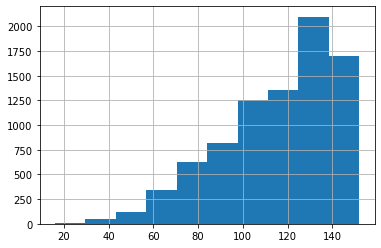

In [17]:
clean_data(data).length.hist()

<AxesSubplot:>

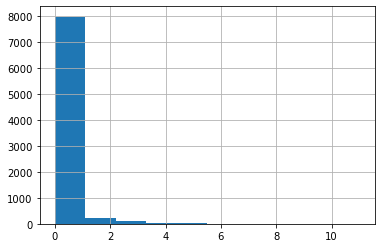

In [34]:
clean_data(data).num_of_line.hist()

<AxesSubplot:>

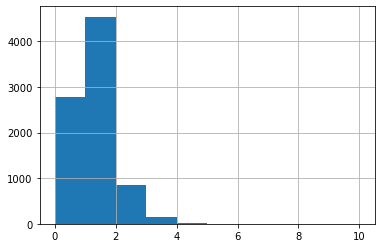

In [36]:
clean_data(data).num_of_at.hist()

In [8]:
data.isna().sum()

Unnamed: 0       0
ID               0
User             0
Location      2218
Created          0
Text             0
Entities         0
dtype: int64

In [9]:
data.shape

(8352, 7)

In [51]:
clean_data(data).corr().style.background_gradient(cmap='RdBu', vmin=-1, vmax=1)

,ID,retweet,length,num_of_words,emoji,day,week_day,hour,at,num_of_at,hashtag,num_of_hashtag,newline,num_of_line
ID,1.000000,-0.014630,0.013857,0.073359,0.158087,-0.572362,0.387705,-0.125936,-0.031057,-0.056522,-0.037238,0.078174,0.093026,0.112160
retweet,-0.014630,1.000000,0.268378,0.205242,-0.034799,-0.001599,-0.000265,-0.036168,0.816604,0.631621,-0.028695,-0.127095,-0.060141,-0.071214
length,0.013857,0.268378,1.000000,0.804253,-0.013964,-0.075329,0.068113,-0.023475,0.284939,0.278766,-0.061576,0.115698,-0.035301,0.003271
num_of_words,0.073359,0.205242,0.804253,1.000000,0.048980,-0.113695,0.072973,-0.023863,0.194256,0.151752,-0.063812,-0.004694,-0.036873,-0.009184
emoji,0.158087,-0.034799,-0.013964,0.048980,1.000000,-0.128740,0.066731,0.028515,-0.067656,-0.089437,0.007327,0.007641,0.290098,0.209270
day,-0.572362,-0.001599,-0.075329,-0.113695,-0.128740,1.000000,-0.174651,-0.047280,0.006737,0.035873,0.049245,0.004311,-0.079443,-0.087283
week_day,0.387705,-0.000265,0.068113,0.072973,0.066731,-0.174651,1.000000,-0.307135,-0.021959,-0.045410,-0.032283,0.061083,0.007813,0.028976
hour,-0.125936,-0.036168,-0.023475,-0.023863,0.028515,-0.047280,-0.307135,1.000000,-0.008167,0.019282,0.019247,-0.000568,0.050293,0.027593
at,-0.031057,0.816604,0.284939,0.194256,-0.067656,0.006737,-0.021959,-0.008167,1.000000,0.795492,-0.045029,-0.152110,-0.098248,-0.107703
num_of_at,-0.056522,0.631621,0.278766,0.151752,-0.089437,0.035873,-0.045410,0.019282,0.795492,1.000000,-0.038836,-0.140619,-0.098065,-0.100091


<AxesSubplot:xlabel='num_of_words', ylabel='num_of_at'>

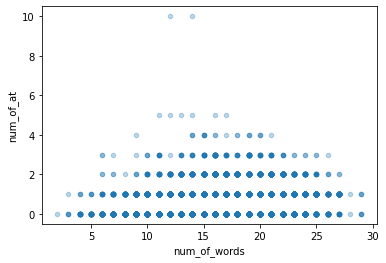

In [54]:
(clean_data(data)
.plot.scatter(x='num_of_words',y='num_of_at', alpha=.3))

(3.0, 11.0)

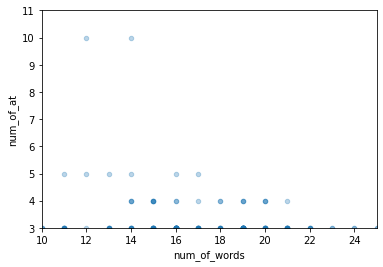

In [58]:
plot_1=(clean_data(data)
.plot.scatter(x='num_of_words',y='num_of_at', alpha=.3))
plot_1.set_xlim(10,25)
plot_1.set_ylim(3,11)


In [61]:
data.loc[3].to_dict

<bound method Series.to_dict of Unnamed: 0                                                    0
ID                                            37302335034101762
User                                               dominiquerdr
Location                                         Québec, Canada
Created                                     2011-02-15 00:09:04
Text          RT @Tharwacolamus: 'Day of Rage' Updates From ...
Entities      {'hashtags': [{'text': '25bahman', 'indices': ...
created                                     2011-02-15 00:09:04
Name: 3, dtype: object>

In [62]:
clean_data(data).loc[3]

ID                                                 37302335034101762
User                                                    dominiquerdr
Location                                              Québec, Canada
Text               RT @Tharwacolamus: 'Day of Rage' Updates From ...
Entities           {'hashtags': [{'text': '25bahman', 'indices': ...
created                                          2011-02-15 00:09:04
retweet                                                         True
entities_parsed    [{'hashtags':, [{'text':, '25bahman',, 'indice...
length                                                           140
num_of_words                                                      19
emoji                                                          False
date                                                      2011-02-15
day                                                               15
week_day                                                           1
hour                              

In [63]:
clean_data(data).loc[3].to_dict

<bound method Series.to_dict of ID                                                 37302335034101762
User                                                    dominiquerdr
Location                                              Québec, Canada
Text               RT @Tharwacolamus: 'Day of Rage' Updates From ...
Entities           {'hashtags': [{'text': '25bahman', 'indices': ...
created                                          2011-02-15 00:09:04
retweet                                                         True
entities_parsed    [{'hashtags':, [{'text':, '25bahman',, 'indice...
length                                                           140
num_of_words                                                      19
emoji                                                          False
date                                                      2011-02-15
day                                                               15
week_day                                                           1
ho

In [65]:
clean_data(data).corr(method='spearman').style.background_gradient(cmap='RdBu', vmin=-1, vmax=1)

,ID,retweet,length,num_of_words,emoji,day,week_day,hour,at,num_of_at,hashtag,num_of_hashtag,newline,num_of_line
ID,1.000000,-0.000508,0.067797,0.084909,0.117890,0.102777,0.775040,-0.256374,-0.033215,-0.049859,-0.064572,0.140258,0.061819,0.065580
retweet,-0.000508,1.000000,0.261472,0.188481,-0.034799,0.014917,0.009684,-0.035722,0.816604,0.736248,-0.028695,-0.127855,-0.060141,-0.062425
length,0.067797,0.261472,1.000000,0.790590,-0.015200,-0.047273,0.082306,-0.023827,0.266156,0.280051,-0.087075,0.028360,-0.038022,-0.034013
num_of_words,0.084909,0.188481,0.790590,1.000000,0.042561,-0.066175,0.071015,-0.018267,0.175136,0.163780,-0.065634,-0.047056,-0.035868,-0.034780
emoji,0.117890,-0.034799,-0.015200,0.042561,1.000000,-0.091797,0.072545,0.024910,-0.067656,-0.086024,0.007327,0.013897,0.290098,0.286388
day,0.102777,0.014917,-0.047273,-0.066175,-0.091797,1.000000,0.317822,-0.388832,0.000510,0.010057,0.012461,0.050126,-0.072360,-0.073405
week_day,0.775040,0.009684,0.082306,0.071015,0.072545,0.317822,1.000000,-0.467274,-0.024836,-0.040918,-0.052009,0.122340,0.017462,0.021475
hour,-0.256374,-0.035722,-0.023827,-0.018267,0.024910,-0.388832,-0.467274,1.000000,-0.007753,0.008201,0.012663,-0.039742,0.052341,0.051292
at,-0.033215,0.816604,0.266156,0.175136,-0.067656,0.000510,-0.024836,-0.007753,1.000000,0.912338,-0.045029,-0.150408,-0.098248,-0.100963
num_of_at,-0.049859,0.736248,0.280051,0.163780,-0.086024,0.010057,-0.040918,0.008201,0.912338,1.000000,-0.041949,-0.151430,-0.105396,-0.107632
